In [5]:
%matplotlib widget
import os

import matplotlib.pyplot as plt
import numpy as np

test = True

with open(f"{os.getcwd()}/{"test_" if test else ""}input") as f:
    data = f.read()
    
p,v = [np.array([np.array([int(num) for num in line.split(" @ ")[i].split(", ")]) for line in data.splitlines()]) for i in [0,1]]
q,w = np.array([24,13,10]), np.array([-3,1,2])

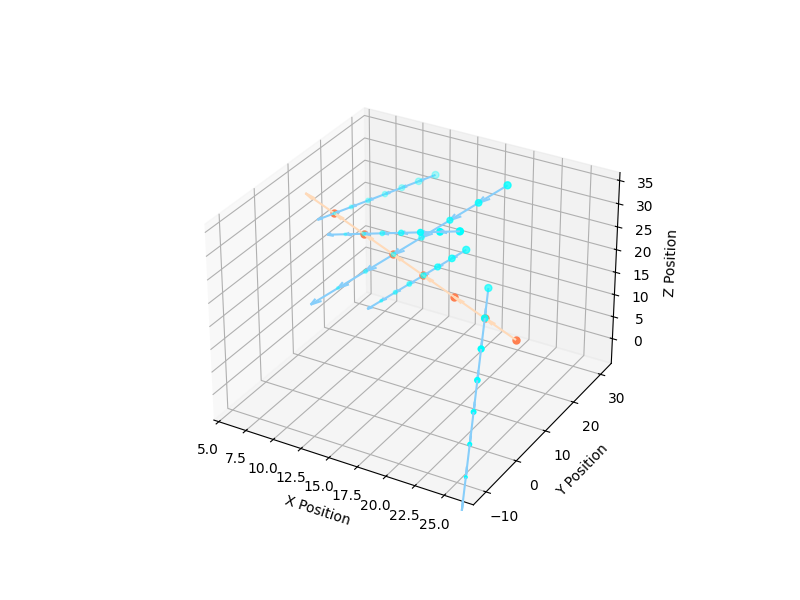

In [6]:
plt.gcf().clear()
plt.close()
fig = plt.figure(figsize=(8,6), dpi=100) if test else plt.figure(figsize=(24,18), dpi=50) 
ax = fig.add_subplot(111, projection="3d")

dt = 1 if test else 1e11
s = 7 if test else 10
T = s * dt

for t in np.linspace(0, T-1, s):
    pt = p + t * v
    
    ax.scatter(
        pt[:, 0],
        pt[:, 1],
        pt[:, 2],
        color="aqua",
        s=25 * (1 - (t/T)),
    )
    for i in range(len(p)):
        ax.quiver(
            *pt[i],
            *v[i],
            color="lightskyblue",
            length=(1 if test else dt) * np.sqrt(np.sum(v[i]**2)),
            normalize=True
        )
        
        
    if test:
        qt = q + t * w
        ax.scatter(
            qt[0],
            qt[1],
            qt[2],
            color="coral",
            s=25,
        )
        ax.quiver(
                *qt,
                *w,
                color="peachpuff",
                length=np.sqrt(np.sum(w**2)),
                normalize=True
            )

    
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Z Position")

plt.show()